# Amazon Market Data: Exploratory Data Analysis

### Objective

Build upon Pivot Table Analysis in MS Excel Spreadsheet to uncover further interesting trends within data.
Identify applicable visualizations for final report/dashboard aimed at stakeholders.

### Methodology

Application of pandas (for data stroage and manipulation) and various visualization packages (matplotlib, seaborn, squarify) to: confirm primary data cleaning was carried out in Excel previously; view the distribution of each feature indiviudally such that any outliers can be removed if necessary and valid; analyze various possible relationships between features to establish any useful insights for the client firm and, generally, which features are most significant with regards to assessing competitor performance.

### Assumptions

* The maximum price the client will set for their product(s) is $750.
* The number of product reviews is directly proportional to the number of product sales.

### Key Takeaways

* Each numerical feature contains numerous outliers; in almost all cases they were kept since they are not mistakes as they are refelctive of products on the market. The only outliers removed were where price > $1000 since these products were at a significantly higher price range than the client product and so should not be considered in competitor analysis.

* The products with the most reviews (and likely sales) generally have prices < $25.

* The most reviewed (i.e. purchased) products have ratings ranging from 4.2 to 4.7 stars, with a significant boost in number of reviews when the rating passes 4.2 stars; this indicates that many consumers have a minimum rating threshold for purchase (4.2 stars).

* Products that offer coupons have slightly lower review counts despite being rated higher. The discrepancy is resolved by considering that coupons are typically applied to previously lower selling products that could be caused by a variety of factors, including products with initially lower ratings (that may have since increased as a result of price reduction).

* Products that offer returns have massively higher review counts (sales) and ratings because dissatisfied customers would be able to return products and so would be less inclined to post negative reviews.

## Loading the dataset

### Import relevant modules

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import squarify
%matplotlib inline
plt.style.use('dark_background')

### Load data into DataFrame

In [2]:
df = pd.read_excel("amazon_data_FINAL.xlsx", sheet_name="Data")
df

,answeredQuestions,brand,currentDate,deliveryDate,deliveryTime,inStock,price,returnEligibility,hasCoupon,hasReviews,reviewsCount,stars,starsBreakdown/1star,starsBreakdown/2star,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,hasSupport
0,308,SHOKZ,2023-07-17,2023-07-23 05:20:17.944,7,False,146.70,False,False,True,10581,4.6,0.04,0.02,0.05,0.12,0.78,False
1,274,JBL,2023-07-17,2023-07-24 00:00:00.000,7,True,74.95,False,False,True,12123,4.3,0.07,0.04,0.06,0.15,0.68,False
2,134,Samsung,2023-07-17,2023-07-23 00:00:00.000,6,True,187.99,False,False,True,2587,4.5,0.05,0.03,0.04,0.12,0.77,False
3,728,TOZO,2023-07-17,2023-07-23 00:00:00.000,6,True,39.99,False,True,True,30530,4.3,0.07,0.04,0.08,0.19,0.62,False
4,367,Samsung,2023-07-17,2023-08-06 00:00:00.000,20,True,99.99,False,False,True,29956,4.4,0.05,0.03,0.06,0.13,0.73,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,128,MOZOTER,2023-07-17,2023-07-23 00:00:00.000,6,True,18.99,False,True,True,7211,4.3,0.06,0.04,0.08,0.17,0.65,False
1138,183,Dascert,2023-07-17,2023-08-04 00:00:00.000,18,True,39.98,False,True,True,17420,4.3,0.07,0.04,0.08,0.15,0.65,False
1139,18,PSIER,2023-07-17,2023-07-25 00:00:00.000,8,True,29.99,False,True,True,193,4.5,0.04,0.04,0.05,0.13,0.74,False
1140,27,Ltinist,2023-07-17,2023-07-23 00:00:00.000,6,True,35.99,False,True,True,1877,4.6,0.04,0.02,0.03,0.08,0.83,False


### Remove unnecassary time information from deliveryDate column

In [3]:
df['deliveryDate'] = df['deliveryDate'].dt.date
df

,answeredQuestions,brand,currentDate,deliveryDate,deliveryTime,inStock,price,returnEligibility,hasCoupon,hasReviews,reviewsCount,stars,starsBreakdown/1star,starsBreakdown/2star,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,hasSupport
0,308,SHOKZ,2023-07-17,2023-07-23,7,False,146.70,False,False,True,10581,4.6,0.04,0.02,0.05,0.12,0.78,False
1,274,JBL,2023-07-17,2023-07-24,7,True,74.95,False,False,True,12123,4.3,0.07,0.04,0.06,0.15,0.68,False
2,134,Samsung,2023-07-17,2023-07-23,6,True,187.99,False,False,True,2587,4.5,0.05,0.03,0.04,0.12,0.77,False
3,728,TOZO,2023-07-17,2023-07-23,6,True,39.99,False,True,True,30530,4.3,0.07,0.04,0.08,0.19,0.62,False
4,367,Samsung,2023-07-17,2023-08-06,20,True,99.99,False,False,True,29956,4.4,0.05,0.03,0.06,0.13,0.73,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,128,MOZOTER,2023-07-17,2023-07-23,6,True,18.99,False,True,True,7211,4.3,0.06,0.04,0.08,0.17,0.65,False
1138,183,Dascert,2023-07-17,2023-08-04,18,True,39.98,False,True,True,17420,4.3,0.07,0.04,0.08,0.15,0.65,False
1139,18,PSIER,2023-07-17,2023-07-25,8,True,29.99,False,True,True,193,4.5,0.04,0.04,0.05,0.13,0.74,False
1140,27,Ltinist,2023-07-17,2023-07-23,6,True,35.99,False,True,True,1877,4.6,0.04,0.02,0.03,0.08,0.83,False


### Confirm that all duplicates and blanks were removed during MS Excel data cleaning

In [4]:
print(f"Duplicate number: {df.duplicated().sum()}")
print(f"Blank number: {df.isna().sum().sum()}")

Duplicate number: 0
Blank number: 0


## One dimensional data analysis

### Objectives:
1. Identify outliers and handle if prudent
2. Visualize the distribution of each feature independently

### Histograms

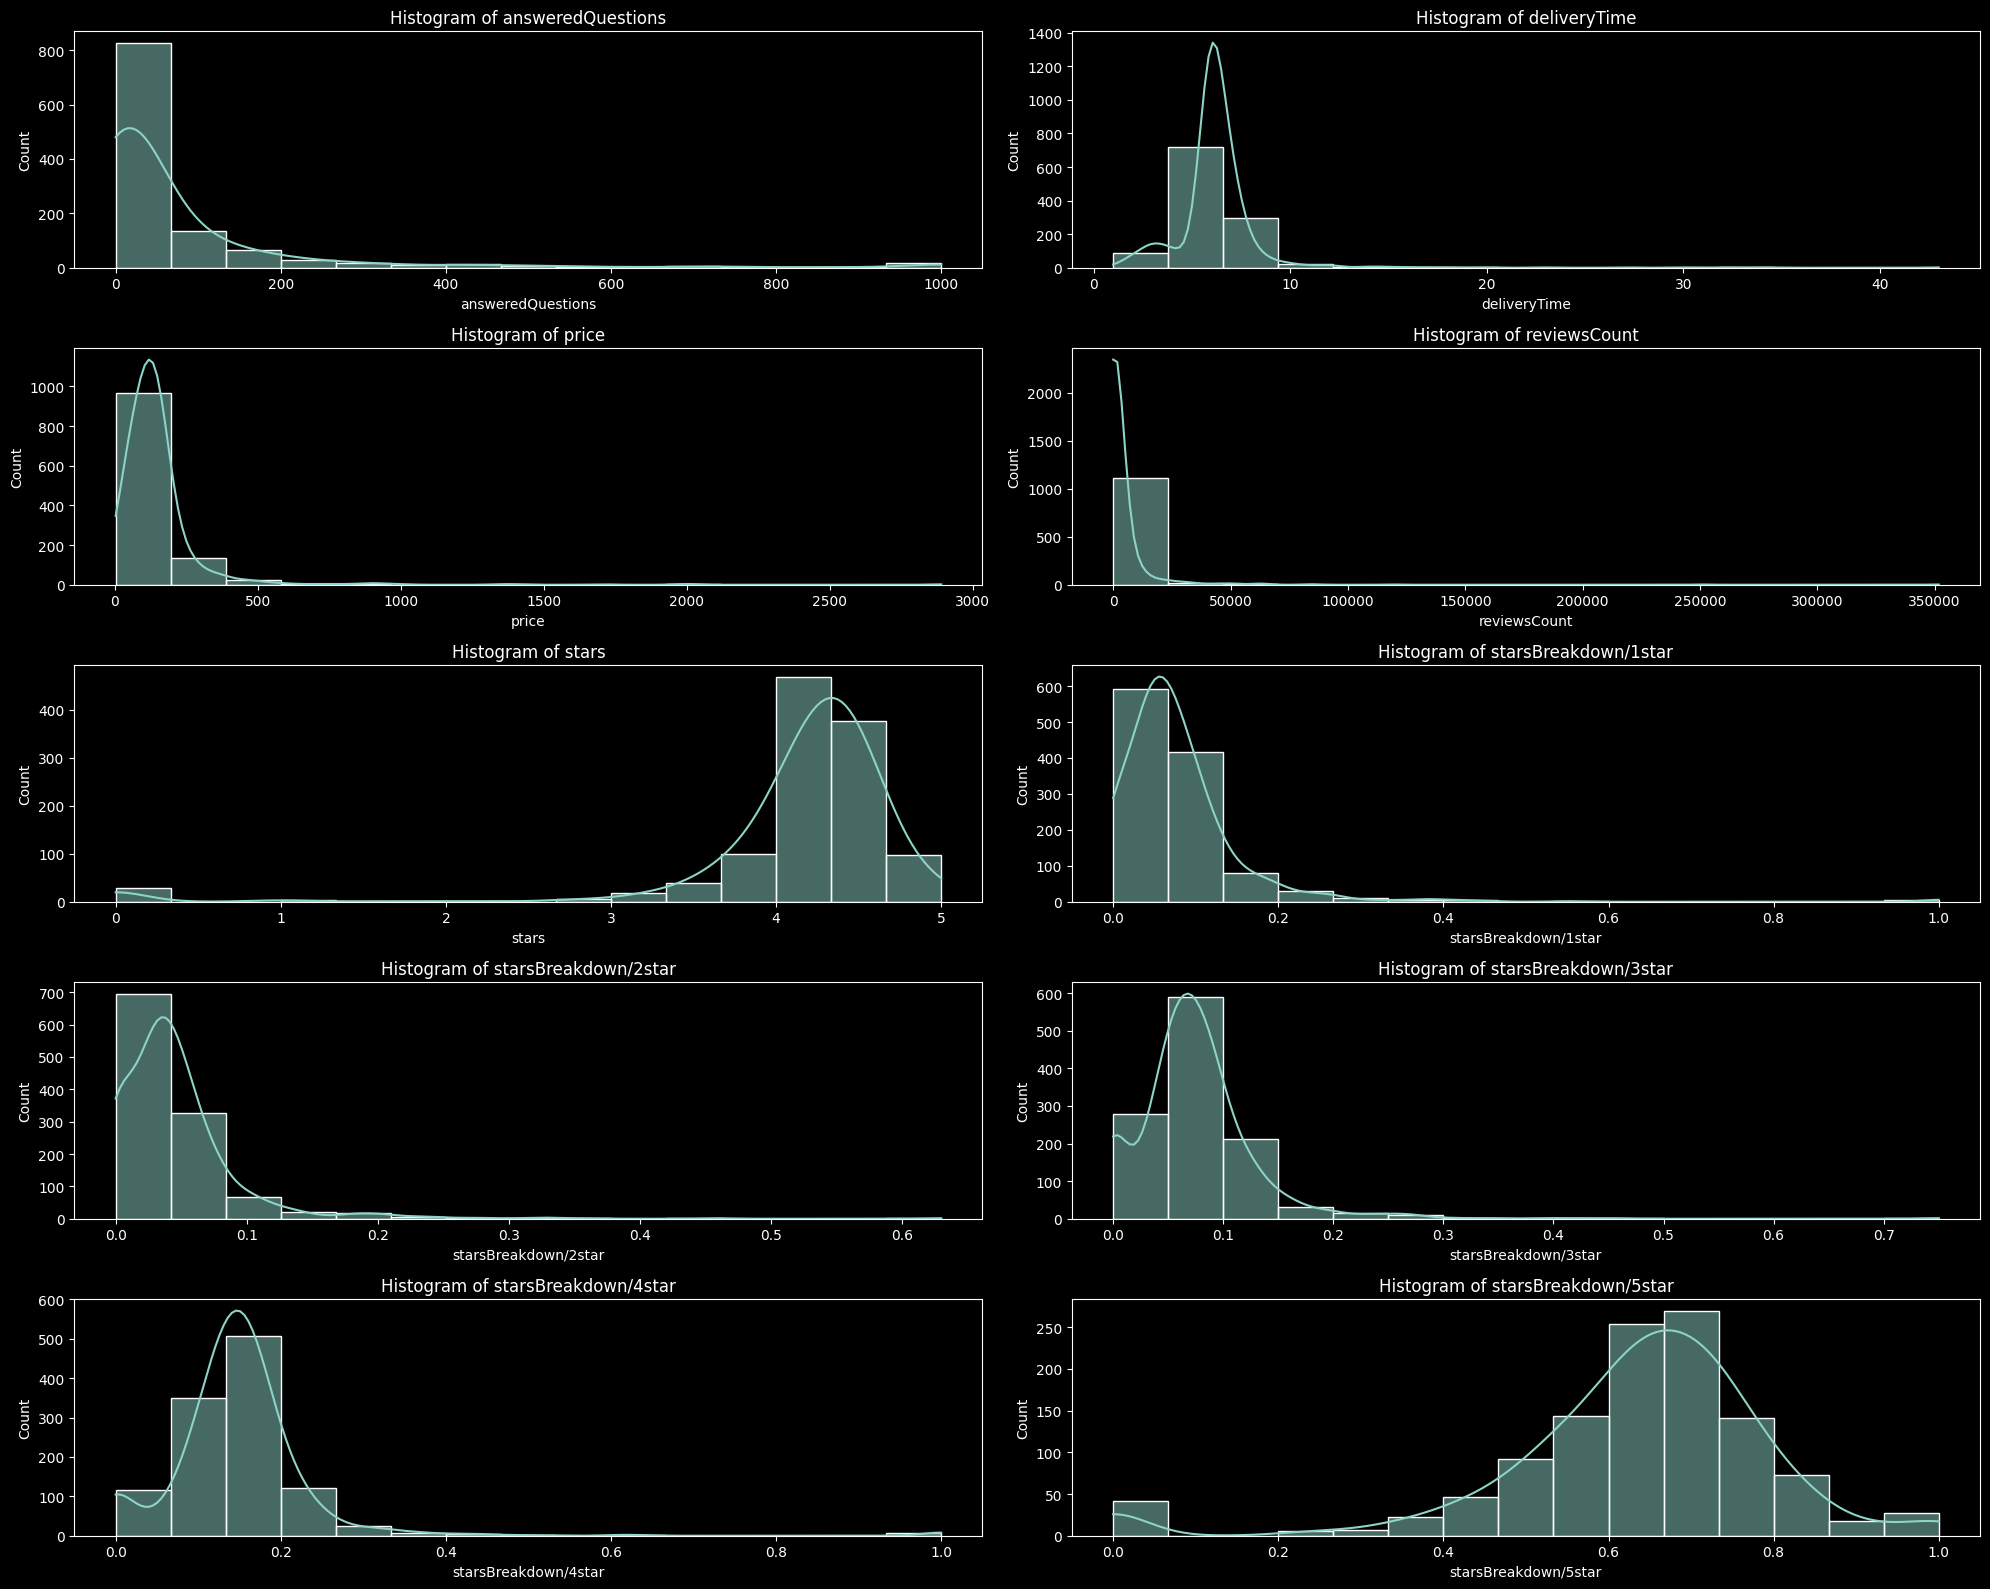

In [9]:
# Extract numerical features from dataset
hist_feats = ['answeredQuestions', 'deliveryTime', 'price', 'reviewsCount', 'stars',
              'starsBreakdown/1star', 'starsBreakdown/2star', 'starsBreakdown/3star',
              'starsBreakdown/4star', 'starsBreakdown/5star']

hist_df = df[hist_feats]

# Calculate required subplot parameter values
num_features = hist_df.shape[1]
num_rows = int(np.ceil(num_features / 2))

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 16))

# Flatten the axes array for more accessible indexing
axes = axes.flatten()

# Iterate over numerical features, creating histograms on each subplot
for i, feature in enumerate(hist_df.columns):
    sns.histplot(data=df, x=feature, bins=15, ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {feature}')

# Delete any empty subplots
if num_features % 2 != 0:
    fig.delaxes(axes[-1])

# Minimize subplot spacing and display
plt.tight_layout()
plt.show()

#### Observations:

Outliers exist for all numerical features. However, they are all relevant since they are representative of the real-world marketplace for headphones so outliers may convey exceptional products.

Further analysis via boxplots may yield further details regarding the outliers.

### Boxplots

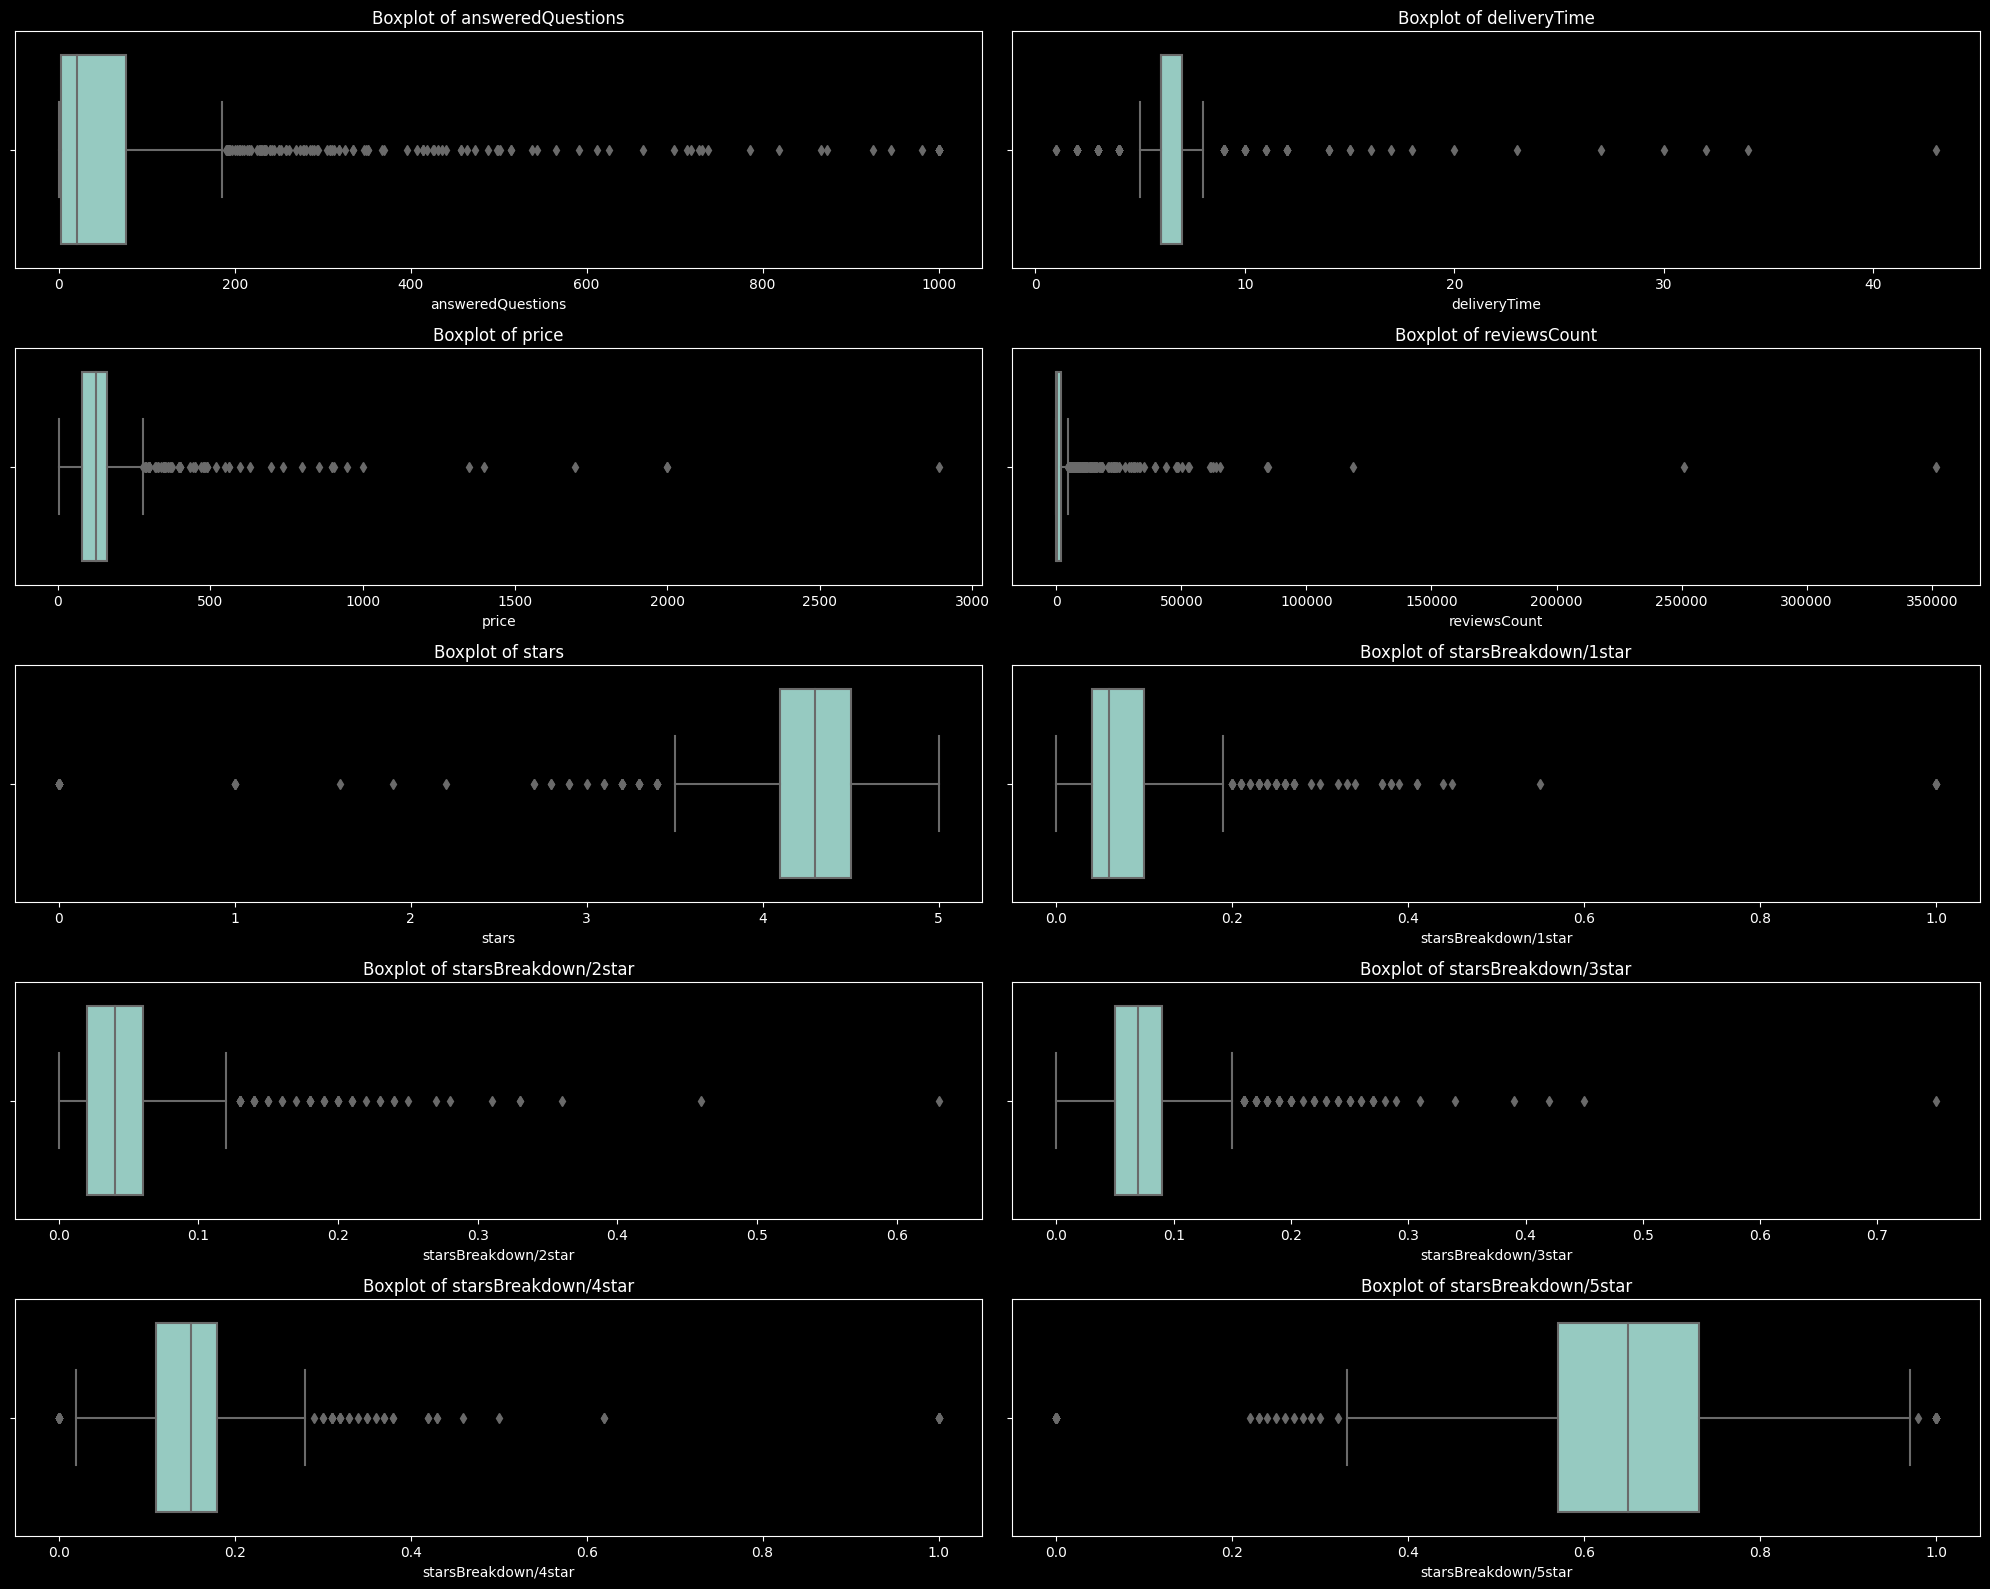

In [10]:
# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 16))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the features and create histograms on each subplot
for i, feature in enumerate(hist_df.columns):
    sns.boxplot(x=hist_df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

# Remove empty subplots if any
if num_features % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Observations:

1. The majority of ratings are 5 stars, with less than 20% 4 star and less than 10% for 1, 2, and 3 stars each.
2. As elborated on previously, all outliers in this context are valid as they represent the online personal audio equipment market.

#### Assumption:
The company is selling their new headphone products at no more than $750 (typical upper price range for headphones); so products with price greater than $1000 will be removed from the dataset

### Price outlier omission

In [11]:
df = df[df['price'] <= 1000]
df['price'].max()

999.95

### Boolean features

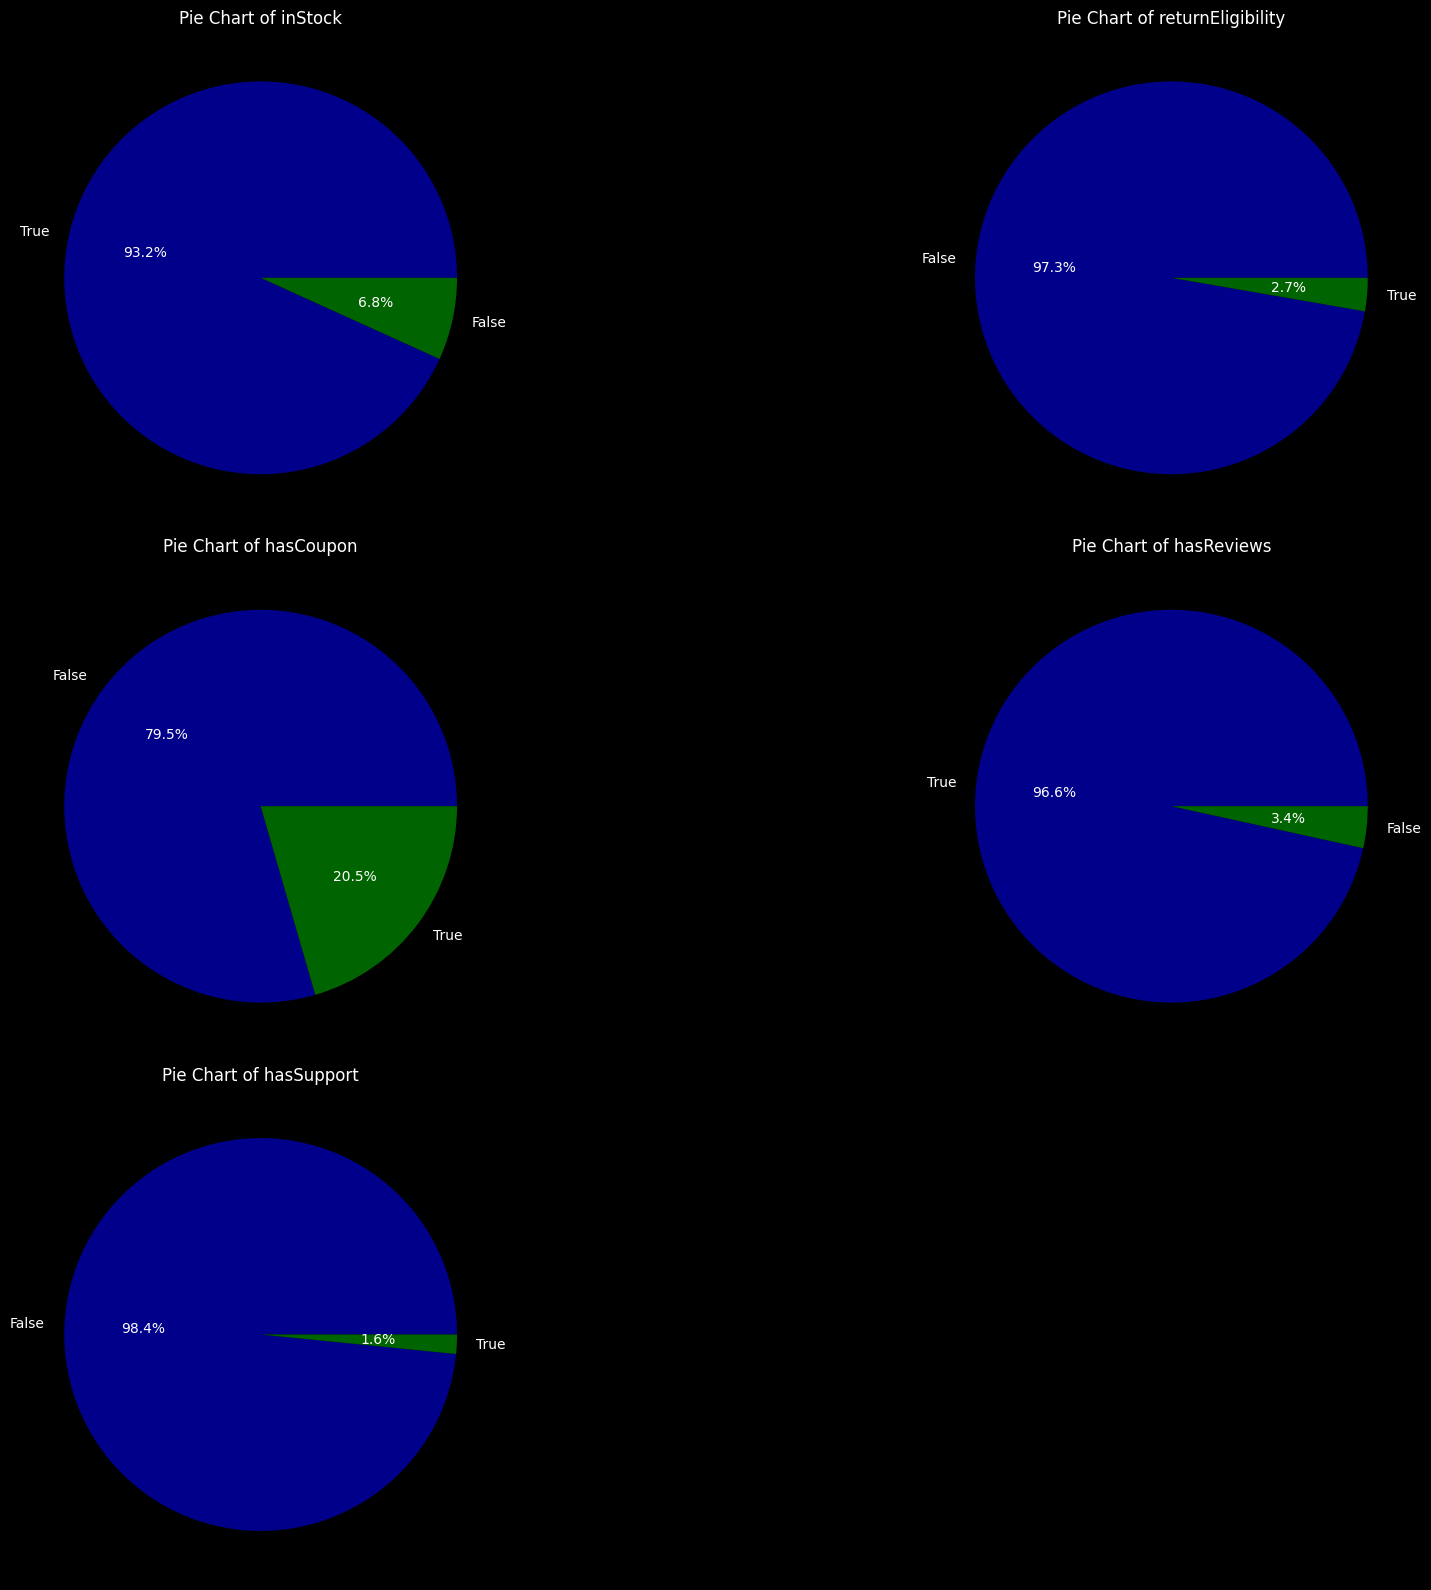

In [12]:
pie_feats = ['inStock', 'returnEligibility', 'hasCoupon', 'hasReviews', 'hasSupport']

pie_df = df[pie_feats]

# Determine the number of subplots
num_features = pie_df.shape[1]
num_rows = int(np.ceil(num_features / 2))

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 16))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the features and create histograms on each subplot
for i, feature in enumerate(pie_df.columns):
    temp = pie_df[feature].value_counts()
    temp.plot.pie(autopct='%1.1f%%', ax=axes[i], ylabel='', colors=['darkblue', 'darkgreen'])
    axes[i].set_title(f'Pie Chart of {feature}')

# Remove empty subplots if any
if num_features % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Observation:

Generally, the boolean features are heavily skewed; thus, when comparing the popularity of products in relation to each boolean feature's value, averages star ratings should be applied rather than the conventional sums since the disparity in value counts would favour the dominant option by default.

## Multi-dimensional data analysis

## Points for exploration

1. Relationship between number of reviews and price
2. Average number of reviews and price for each overall product rating value
3. Relationship between delivery time and average rating
4. Most expensive brands
5. Relationship between coupon offering and price/average rating
6. Most popular brands
7. Relationship between returns eligibility and average rating/popularity

### 1. Relationship between number of reviews and price
<a id="reviews-price"></a>

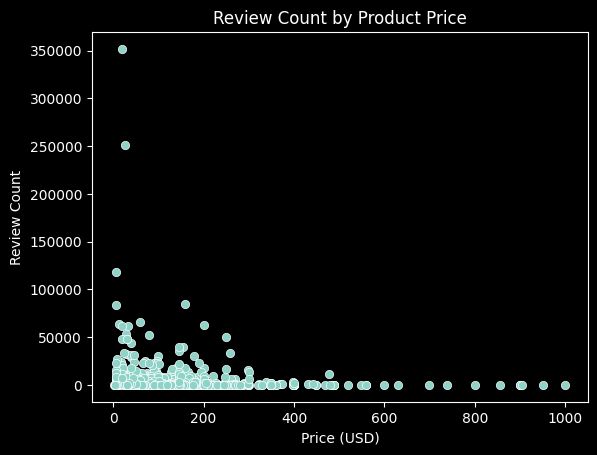

Correlation betwen price and review count: -0.12256592695803788


In [13]:
sns.scatterplot(data=df, x="price", y="reviewsCount")
plt.xlabel('Price (USD)')
plt.ylabel('Review Count')
plt.title('Review Count by Product Price')
plt.show()
plt.close()

corr = df['price'].corr(df['reviewsCount'])
print(f"Correlation betwen price and review count: {corr}")

There is negligble direct correlation between review count and price; however, comparing the median price for defined price ranges may yield insight into which price ranges are most reviewed (and presumably most purchased).

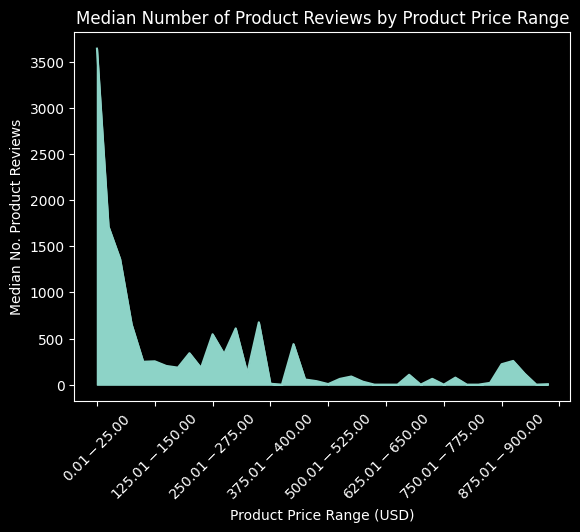

,Price Binned,reviewsCount
0,$0.01 - $25.00,3643.5
1,$25.01 - $50.00,1713.5
2,$50.01 - $75.00,1363.0
3,$75.01 - $100.00,653.0
4,$100.01 - $125.00,248.0
5,$125.01 - $150.00,253.0
6,$150.01 - $175.00,202.5
7,$175.01 - $200.00,184.5
8,$200.01 - $225.00,341.0
9,$225.01 - $250.00,182.0


In [91]:
interval = 25
bins = [a for a in range(0, 1000 + interval, interval)]

labels = [f"${bins[i] + .01} - ${format(float(bins[i+1]), '.2f')}" for i in range(len(bins)-1)]

df['Price Binned'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)
price_med_review = df.groupby('Price Binned')['reviewsCount'].median().reset_index()

price_med_review.plot.area(x='Price Binned', y='reviewsCount', legend=False)
plt.xticks(rotation=45)
plt.xlabel("Product Price Range (USD)")
plt.ylabel("Median No. Product Reviews")
plt.title("Median Number of Product Reviews by Product Price Range")
plt.show()
plt.close()

price_med_review

#### Finding:
The most reviewed products have prices < $25.00; generally, the review count is significantly lower at higher prices although there are a few 'spikes' in the $200 to $500 range - likely caused by some highly popular mid-to-upper price range headphone products.

### 2. Number of reviews and price for each overall product rating value

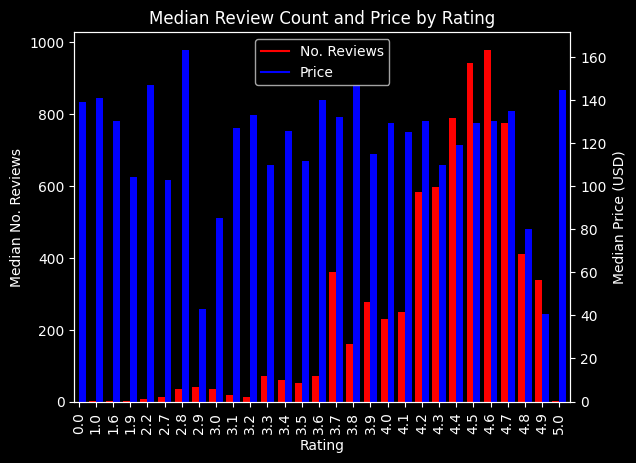

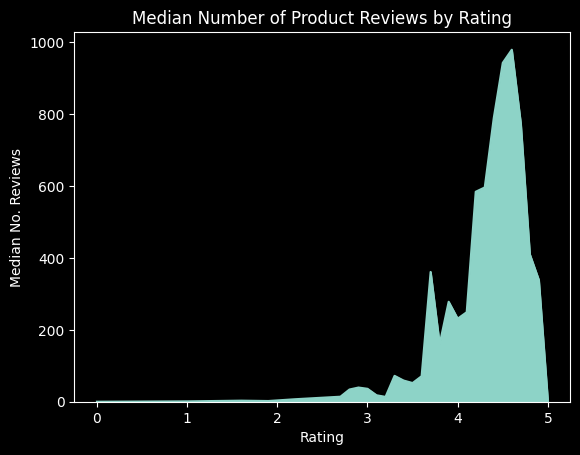

In [93]:
df_rating = df.groupby('stars')
avg_review_rating = df_rating['reviewsCount'].median()
avg_price_rating = df_rating['price'].median()

avg_rating_data = pd.concat([avg_review_rating, avg_price_rating], axis=1)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

avg_rating_data['reviewsCount'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
avg_rating_data['price'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Median No. Reviews')
ax2.set_ylabel('Median Price (USD)')
ax.set_xlabel('Rating')
ax.set_title('Median Review Count and Price by Rating')

handles = [plt.Line2D([], [], color='red', label='No. Reviews'),
           plt.Line2D([], [], color='blue', label='Price')]
labels = ['No. Reviews', 'Price']
plt.legend(handles=handles, labels=labels, loc='upper center')

plt.show()
plt.close()

df_que_rat = df.groupby('stars')['reviewsCount'].median().reset_index().sort_values('stars', ascending=True)
df_que_rat.plot.area(x='stars', y='reviewsCount', legend=False)
plt.xlabel('Rating')
plt.ylabel('Median No. Reviews')
plt.title('Median Number of Product Reviews by Rating')
plt.show()
plt.close()

#### Analysis

There is no discernible relationship between product rating and price.

The highest review counts (i.e. most popular products) are rated ~ 4.2 to 4.7 stars; higher rated products tend to have fewer reviews likely because they have been on the market for less time or the brand is less popular generally.

Nevertheless, the obvious boost in review count when rating >= 4.2 stars suggests consumers are more more inclined to buy purchase headphone products above this threshold.

### 3. Relationship between delivery time and rating

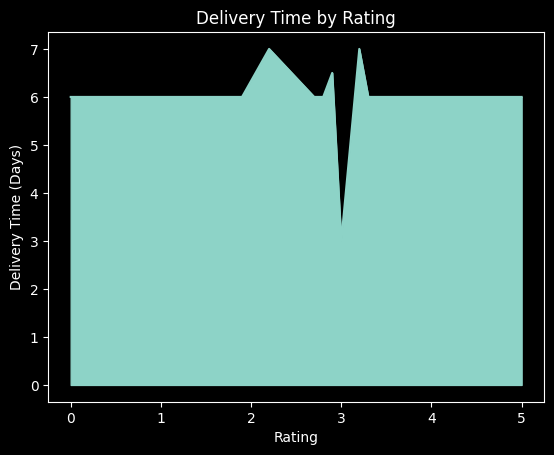

Correlation betwen rating and delivery time: -0.04702247888111771


In [89]:
df_del_rat = df.groupby('stars')['deliveryTime'].median().reset_index().sort_values('stars', ascending=True)
df_del_rat.plot.area(x='stars', y='deliveryTime', legend=False)
plt.xlabel('Rating')
plt.ylabel('Delivery Time (Days)')
plt.title('Delivery Time by Rating')
plt.show()
plt.close()

corr = df['stars'].corr(df['deliveryTime'])
print(f"Correlation betwen rating and delivery time: {corr}")

#### Finding

Minimal correlation between rating and delivery time; thus, the relationship between these features is unimportant

### 4. Most expensive brands

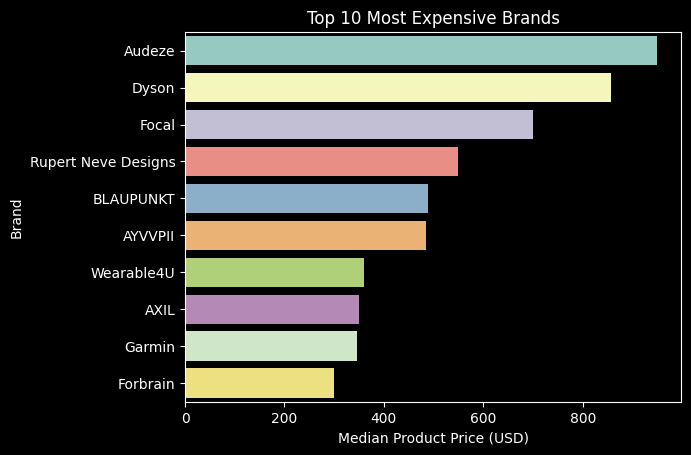

In [73]:
# Extract median price information by ordered by top 10 brands
df_brand = df.groupby('brand')
avg_price = df_brand['price'].median().reset_index().sort_values('price', ascending=False).head(10)

# Generate horizontal bar chart
sns.barplot(data=avg_price, x='price', y='brand', orient='h')

# Configure chart features and display
plt.ylabel('Brand')
plt.xlabel('Median Product Price (USD)')
plt.title('Top 10 Most Expensive Brands')
plt.show()
plt.close()

### 5. Relationship between coupon availability and average rating and price

In [78]:
# Replace true/false values by yes/no in dataframe
df = df.replace({True: 'Yes', False: 'No'})
df.head()

,answeredQuestions,brand,currentDate,deliveryDate,deliveryTime,inStock,price,returnEligibility,hasCoupon,hasReviews,reviewsCount,stars,starsBreakdown/1star,starsBreakdown/2star,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,hasSupport,Price Binned
0,308,SHOKZ,2023-07-17,2023-07-23,7,No,146.70,No,No,Yes,10581,4.6,0.04,0.02,0.05,0.12,0.78,No,$125.01 - $150.00
1,274,JBL,2023-07-17,2023-07-24,7,Yes,74.95,No,No,Yes,12123,4.3,0.07,0.04,0.06,0.15,0.68,No,$50.01 - $75.00
2,134,Samsung,2023-07-17,2023-07-23,6,Yes,187.99,No,No,Yes,2587,4.5,0.05,0.03,0.04,0.12,0.77,No,$175.01 - $200.00
3,728,TOZO,2023-07-17,2023-07-23,6,Yes,39.99,No,Yes,Yes,30530,4.3,0.07,0.04,0.08,0.19,0.62,No,$25.01 - $50.00
4,367,Samsung,2023-07-17,2023-08-06,20,Yes,99.99,No,No,Yes,29956,4.4,0.05,0.03,0.06,0.13,0.73,No,$75.01 - $100.00


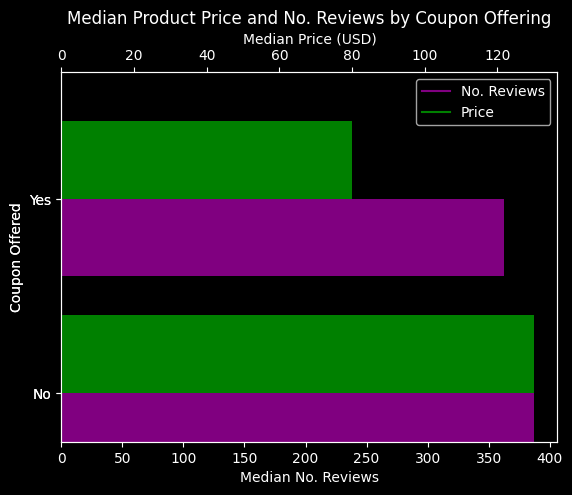

,reviewsCount,price,stars
hasCoupon,,,
No,387.0,129.99,4.3
Yes,363.0,79.99,4.4


In [90]:
# Obtain median star rating grouped by coupon options (true/false)
df_coupon = df.groupby('hasCoupon')
avg_reviews_coup = df_coupon['reviewsCount'].median()
avg_price_coup = df_coupon['price'].median()
avg_rating_coup = df_coupon['stars'].median()

# Merge data series into one dataframe
avg_coup_data = pd.concat([avg_reviews_coup, avg_price_coup, avg_rating_coup], axis=1)

# Generate figure with set parameters
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twiny()
width = .4

# Generate horizontal bar plots for each feature on different axes
avg_coup_data['reviewsCount'].plot(kind='barh', color='purple', ax=ax, width=width, position=1)
avg_coup_data['price'].plot(kind='barh', color='green', ax=ax2, width=width, position=0)

# Define axes and chart titles
ax.set_xlabel('Median No. Reviews')
ax2.set_xlabel('Median Price (USD)')
ax.set_ylabel('Coupon Offered')
ax2.set_ylabel('Coupon Offered')
ax.set_title('Median Product Price and No. Reviews by Coupon Offering')

# Configure legend details
handles = [plt.Line2D([], [], color='purple', label='No. Reviews'),
           plt.Line2D([], [], color='green', label='Price')]
labels = ['No. Reviews', 'Price']
plt.legend(handles=handles, labels=labels)

# Display figure
plt.show()
plt.close()

avg_coup_data.head()

#### Comments

Products w/ coupons have ~ 38% lower price and ~ 6% lower number of reviews (i.e. less sales) than products w/o coupons.

The lower price of coupon products is expected, although the large magntiude of the price difference suggests that lower priced products tend to have coupon availability.

The lower review count of coupon products does not correspond with the "Median Number of Reviews by Rating" graph from (2) that suggests 4.4 stars products (median for products w/ coupons) have significantly higher numbers of reviews than 4.3 stars products (median for products w/o coupons). Coupons are offered to further encourage customer purchases; thus, the discrepancy can be explained by lower-sales products being more inclined to offer coupons. 

The reason for lower sales may vary, but some potential reasons would be: less-known brands, excessively high (original) product price, product has been on the market for relatively little time, initially lower rating. Although, the difference in review counts is small so these effects are likely minimal.

### 6. Most Reviews by Brand

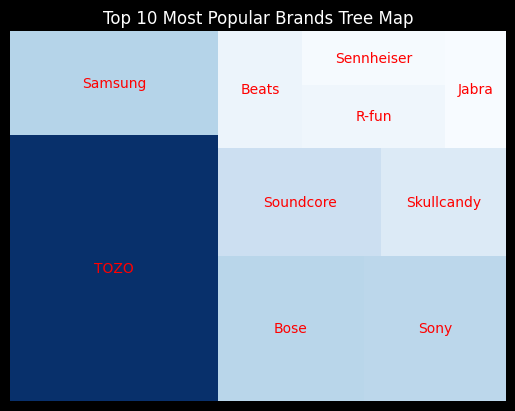

In [98]:
pop_brands = df_brand['reviewsCount'].sum().reset_index().sort_values('reviewsCount', ascending=False).head(10)

# Calculate the sizes for the tree map
sizes = pop_brands['reviewsCount'].values

# Assign colors to the tree map rectangles
cmap = plt.cm.Blues
color_values = pop_brands['reviewsCount'].values
norm = plt.Normalize(vmin=min(color_values), vmax=max(color_values))
colors = [cmap(norm(value)) for value in color_values]

# Create the tree map
squarify.plot(sizes=sizes, label=pop_brands['brand'], color=colors, text_kwargs={'color': 'red'})

# Add title and remove axis labels
plt.title('Top 10 Most Popular Brands Tree Map')
plt.axis('off')

# Display the plot
plt.show()
plt.close()

### 7. Relationship between returns eligibility and rating/popularity

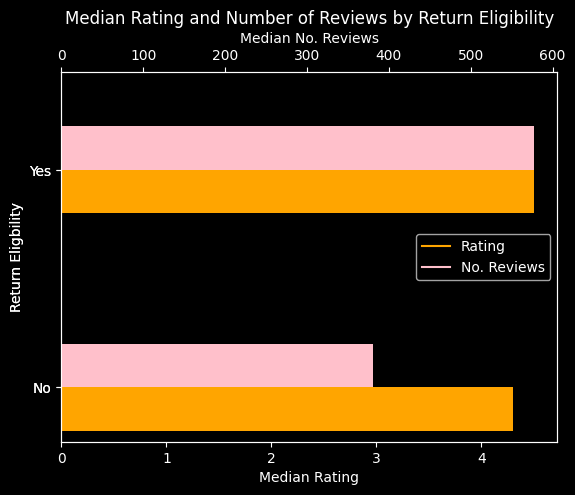

,stars,reviewsCount
returnEligibility,,
No,4.3,380.0
Yes,4.5,577.0


In [104]:
df_returns = df.groupby('returnEligibility')
rating_returns = df_returns['stars'].median()
pop_returns = df_returns['reviewsCount'].median()

returns_data = pd.concat([rating_returns, pop_returns], axis=1)

fig = plt.figure()

ax = fig.add_subplot(111)
ax2 = ax.twiny()

width = .2

returns_data['stars'].plot(kind='barh', color='orange', ax=ax, width=width, position=1)
returns_data['reviewsCount'].plot(kind='barh', color='pink', ax=ax2, width=width, position=0)

ax.set_xlabel('Median Rating')
ax2.set_xlabel('Median No. Reviews')
ax.set_ylabel('Return Eligbility')
ax2.set_ylabel('Return Eligbility')
ax.set_title('Median Rating and Number of Reviews by Return Eligibility')

handles = [plt.Line2D([], [], color='orange', label='Rating'),
           plt.Line2D([], [], color='pink', label='No. Reviews')]
labels = ['Rating', 'No. Reviews']
plt.legend(handles=handles, labels=labels, loc='center right')

plt.show()
plt.close()

returns_data

#### Comment
Products that allow returns have ~ 52% more reviews (indicating much greater sales) and greater median rating by 0.2 stars. This is consistent with the analysis of median review count by rating, that indicates that products with 4.5 star rating have considerbaly more reviews (and likely sales) than 4.3 star products. With regard to return eligibility, customer satisfaction is more likely if returns are available since dissatsified customers have the option to be refunded; logically, they would be less likely to leave negative reviews.

## Data Export for Dashboard

The EDA has yielded useful insights into relevant trends within the dataset that can inform the client company about the market.

For stakeholders, a dashboard would be pertinent with regard to conveying the key trends in a user-friendly format. Thus, the DataFrame must be exported in suitable filetype (e.g. csv).

In [106]:
df.set_index('answeredQuestions').to_excel('dasboard_data.xlsx', sheet_name='Data')